In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


In [4]:
df = pd.read_csv(r"weather_forecast.csv")
print(df.head())

    Outlook Temperature Humidity   Windy Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


In [6]:
encoder = OneHotEncoder(drop='first')
x_encoded = encoder.fit_transform(df.drop('Play',axis=1)).toarray()
y=df['Play']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [14]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

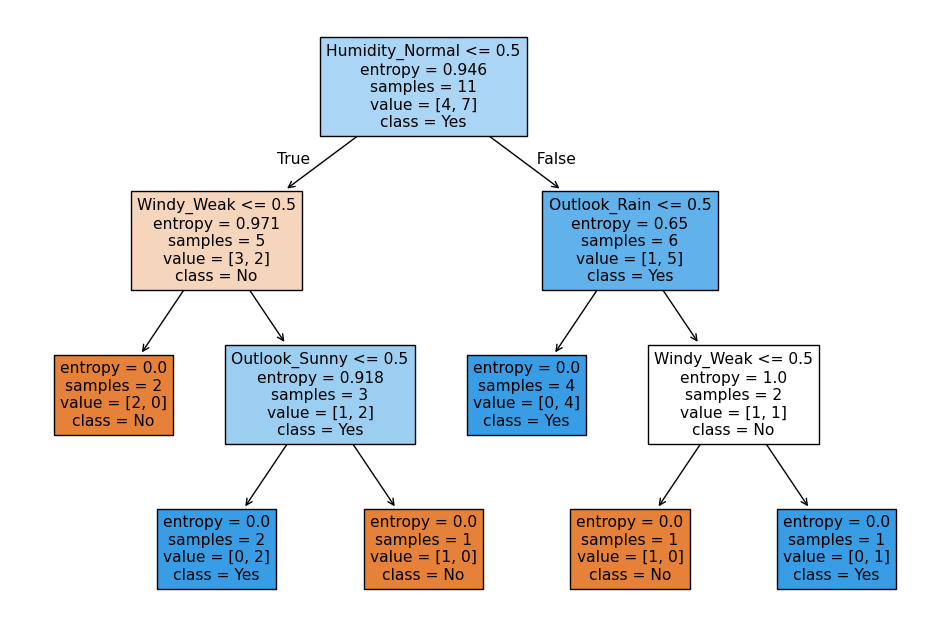

In [15]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

In [11]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(accuracy)

0.6666666666666666


In [16]:
classifier_cart = DecisionTreeClassifier(criterion='gini',random_state=42)
classifier_cart.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

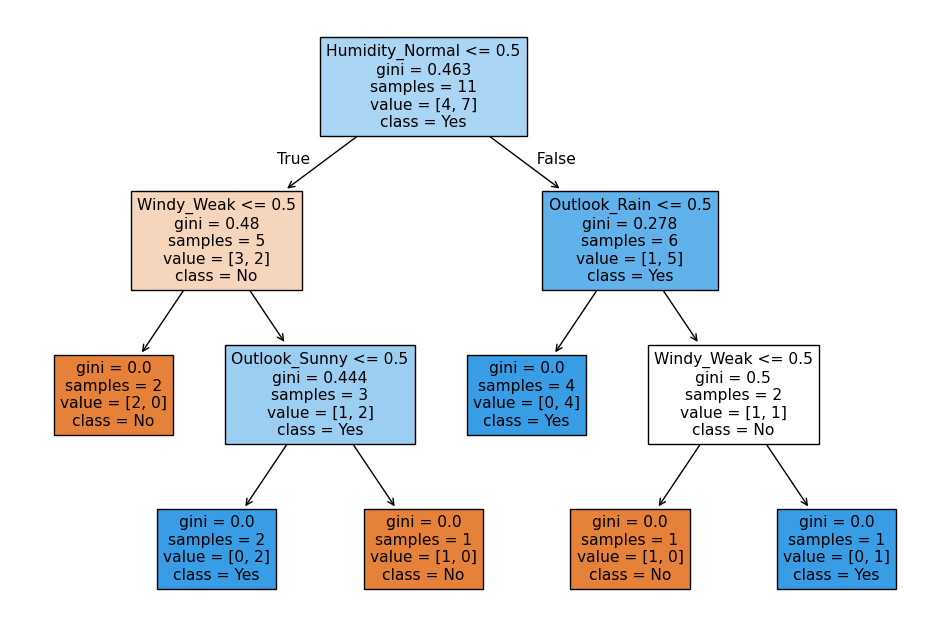

In [17]:
plt.figure(figsize=(12,8))
plot_tree(classifier_cart, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

In [ ]:
y_pred_cart = 